In [28]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Circuit-1
---

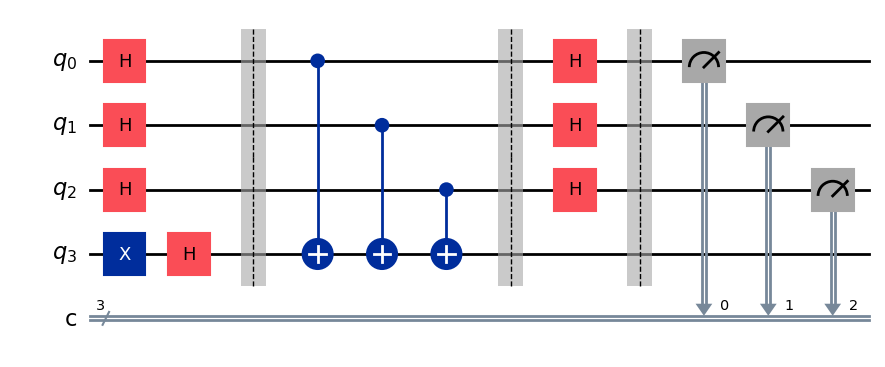

In [29]:
n = 3
dj_circuit = QuantumCircuit(n + 1, n)


for qubit in range(n):
    dj_circuit.h(qubit)


dj_circuit.x(3)
dj_circuit.h(3)
dj_circuit.draw('mpl')

oracle = QuantumCircuit(n+1)
b_str = "000"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle.x(qubit)

oracle.barrier()

for qubit in range(n):
    oracle.cx(qubit, n)

oracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle.x(qubit)

dj_circuit = dj_circuit.compose(oracle)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw('mpl')

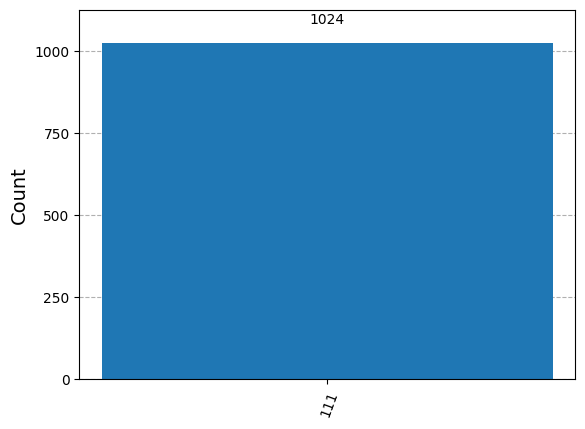

In [30]:
aer_sim = AerSimulator()
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

# Circuit-2
---

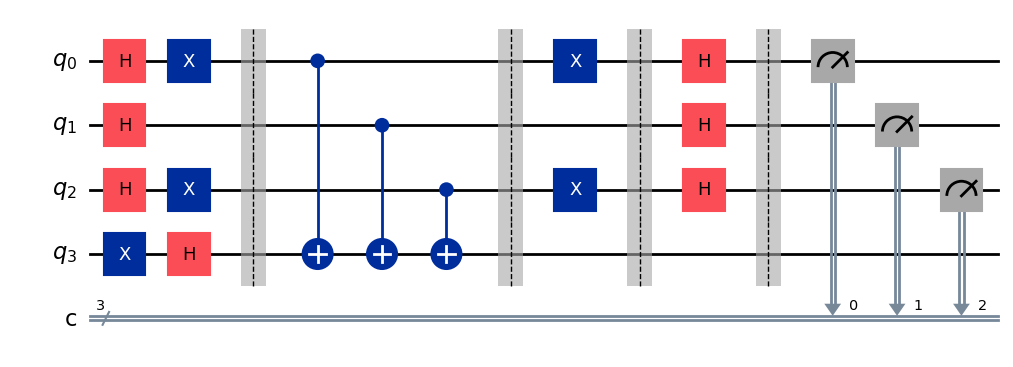

In [35]:
dj_circuit = QuantumCircuit(n + 1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(3)
dj_circuit.h(3)

oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle.x(qubit)

oracle.barrier()

for qubit in range(n):
    oracle.cx(qubit, n)

oracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle.x(qubit)

dj_circuit = dj_circuit.compose(oracle)

dj_circuit.barrier()
for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw('mpl')

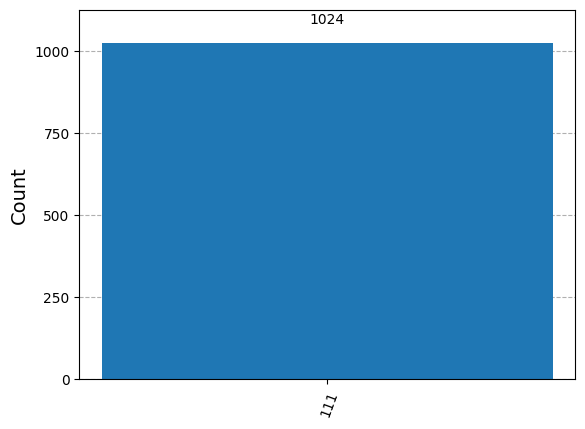

In [36]:
aer_sim = AerSimulator()
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)